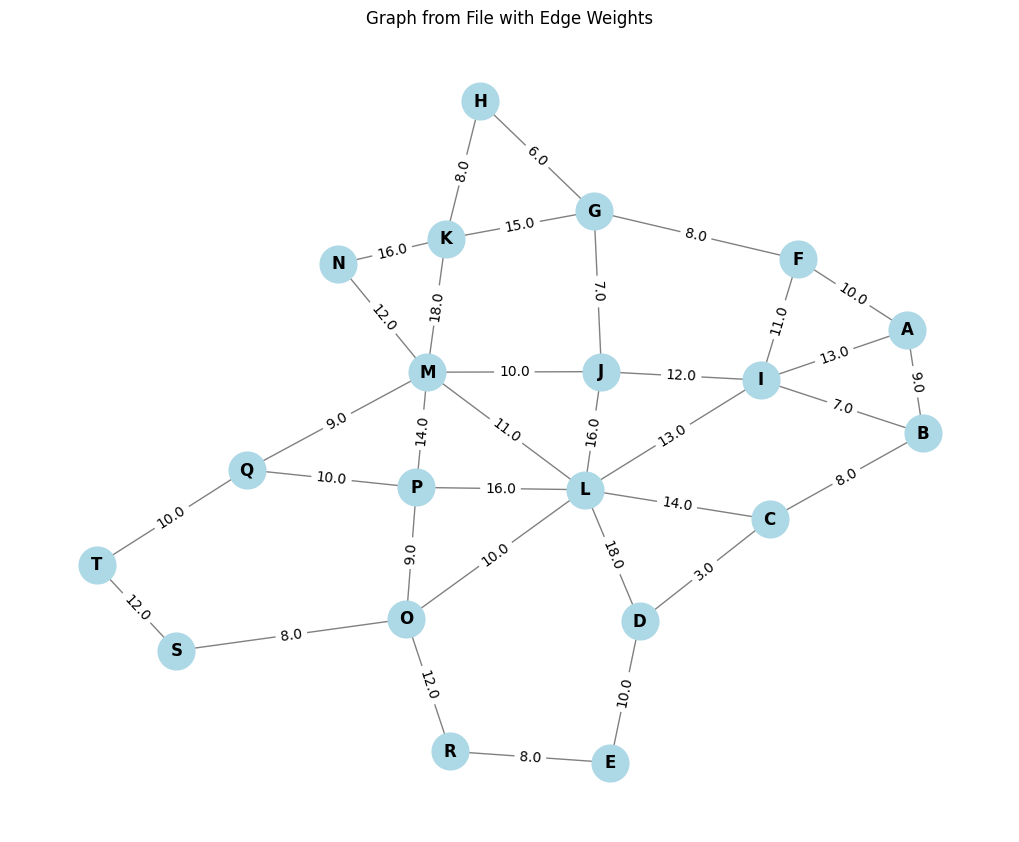

In [1]:
# Exibe o grafo do arquivo graph.txt
from functions import visualizar_grafo
visualizar_grafo("grafo.txt")

In [2]:
from functions import *
np.set_printoptions(threshold=np.inf)

# Utiliza ordem alfabetica para descoberta dos nós
def DFS(inicial, final, matriz_adj):
    descobertos = []
    # Pilha de vertices a serem explorados
    pilha = []
    pais = dict()
    
    # Descobre o vertice inicial e o adiciona na pilha para ser explorado
    descobertos.append(inicial)
    pilha.append(inicial)

    if inicial+1 > len(matriz_adj) or final+1 > len(matriz_adj):
        print("Vertice inicial ou final não existe no grafo")
        return []
    while True:
        # Obtem o primeiro item da pilha
        v = pilha.pop()
        # Obtém os vizinhos do vertice v
        vizinhos = [i for i in obter_vizinhos(v, matriz_adj) if i not in descobertos]
        for vizinho in vizinhos:
            # Descobre cada vizinho
            descobertos.append(vizinho)
            pais[vizinho] = v
            # Encerra o while se o vertice atual for igual ao destino
            if vizinho == final:
                return descobertos, pais
        # Adiciona a lista de vizinhos em ordem inversa na pilha
        pilha += vizinhos[::-1]

matriz_adj = gerar_matriz_adjacente("grafo.txt")
inicial, final = letter_to_int("G")-1, letter_to_int("S")-1 # Retorna o número correspondente a ordem alfabética

descobertos, pais = DFS(inicial, final, matriz_adj)

imprimir_resultado(incrementar(descobertos), usarLetras=True)

Ordem de descoberta:  ['G', 'F', 'H', 'J', 'K', 'A', 'I', 'B', 'C', 'D', 'L', 'E', 'R', 'O', 'P', 'S']


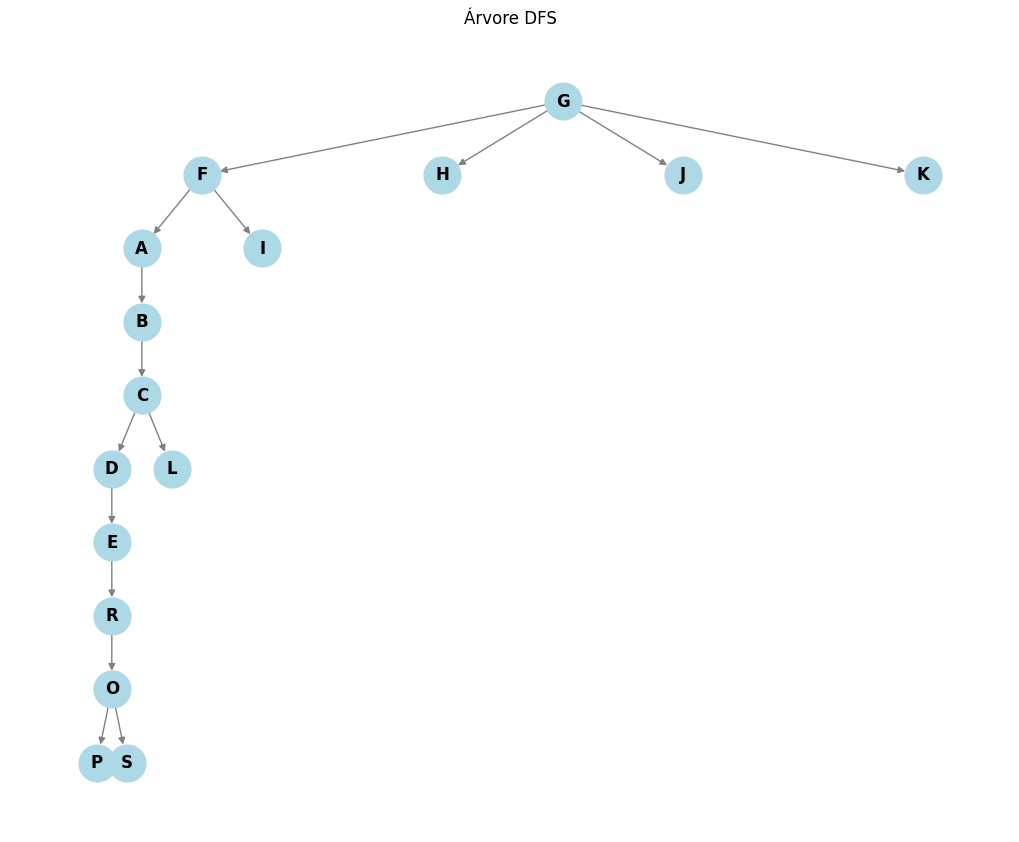

In [3]:
visualizar_arvore_de_pais(incrementar(pais), usarLetras=True, titulo="Árvore DFS")